<a href="https://colab.research.google.com/github/darko-k/MasterPy/blob/master/passport_work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


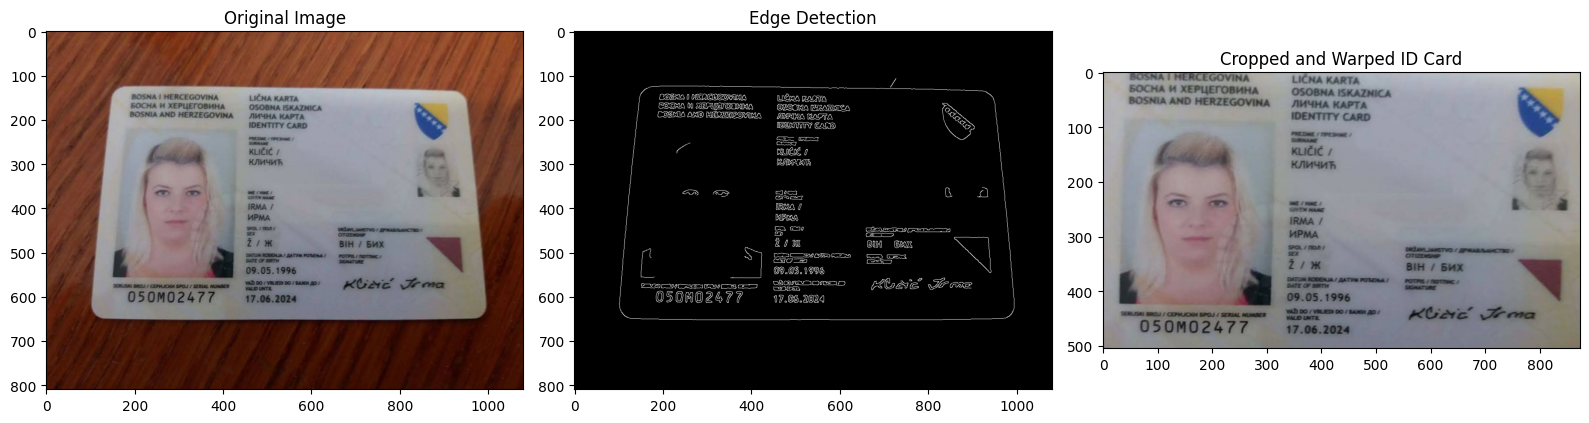

In [1]:
# Install required libraries (if not already installed)
!pip install opencv-python-headless matplotlib

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the image in Google Drive
image_path = "/content/drive/MyDrive/MyFolder/passport/FB_IMG_2.jpg"

# Read the image
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using the Canny method
edges = cv2.Canny(blurred, 50, 150)

# Find contours based on the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assumed to be the ID card)
largest_contour = max(contours, key=cv2.contourArea)

# Approximate the contour to a polygon
epsilon = 0.02 * cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, epsilon, True)

# Ensure the contour has four points (indicating a quadrilateral)
if len(approx) == 4:
    # Sort points in a consistent order: top-left, top-right, bottom-right, bottom-left
    points = approx.reshape(4, 2)
    points = sorted(points, key=lambda x: (x[1], x[0]))  # Sort by y, then x

    top_points = sorted(points[:2], key=lambda x: x[0])  # Sort top two by x
    bottom_points = sorted(points[2:], key=lambda x: x[0])  # Sort bottom two by x

    ordered_points = np.array([top_points[0], top_points[1], bottom_points[1], bottom_points[0]], dtype="float32")

    # Define the width and height of the new image
    width = int(max(np.linalg.norm(ordered_points[0] - ordered_points[1]),
                    np.linalg.norm(ordered_points[2] - ordered_points[3])))
    height = int(max(np.linalg.norm(ordered_points[0] - ordered_points[3]),
                     np.linalg.norm(ordered_points[1] - ordered_points[2])))

    # Destination points for the perspective transformation
    dst_points = np.array([[0, 0], [width-1, 0], [width-1, height-1], [0, height-1]], dtype="float32")

    # Compute the perspective transform matrix and apply it
    matrix = cv2.getPerspectiveTransform(ordered_points, dst_points)
    warped = cv2.warpPerspective(image, matrix, (width, height))

    # Display the results
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title("Edge Detection")
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Cropped and Warped ID Card")
    plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()
else:
    print("The detected contour does not have four sides and cannot be warped.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


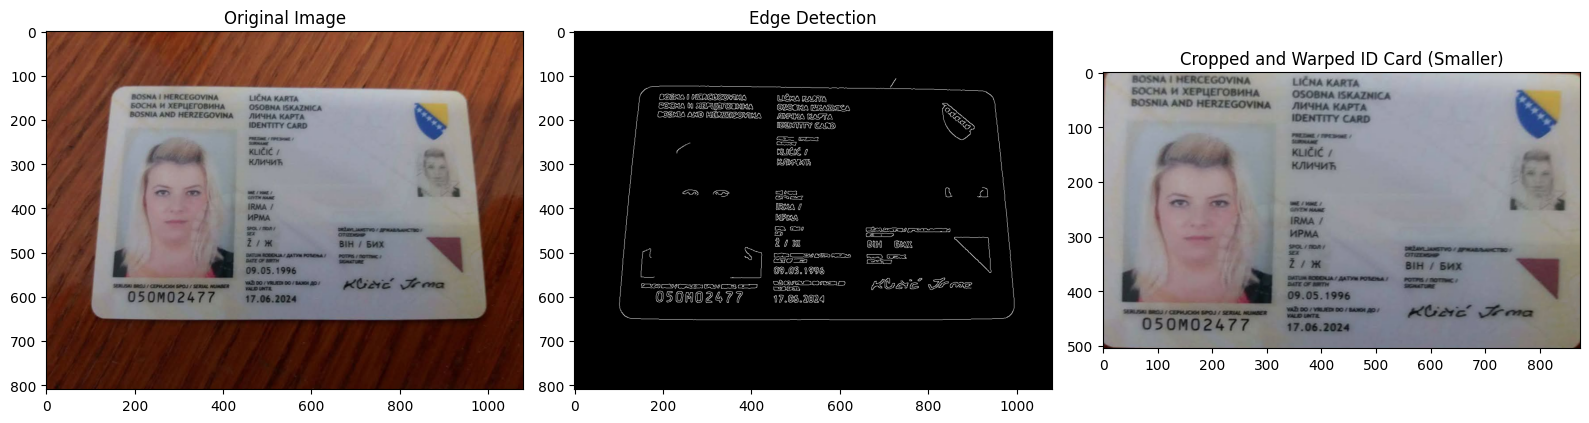

In [5]:
# Install required libraries (if not already installed)
!pip install opencv-python-headless matplotlib

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the image in Google Drive
image_path = "/content/drive/MyDrive/MyFolder/passport/FB_IMG_2.jpg"

# Read the image
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using the Canny method
edges = cv2.Canny(blurred, 50, 150)

# Find contours based on the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assumed to be the ID card)
largest_contour = max(contours, key=cv2.contourArea)

# Approximate the contour to a polygon
epsilon = 0.02 * cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, epsilon, True)

# Ensure the contour has four points (indicating a quadrilateral)
if len(approx) == 4:
    # Sort points in a consistent order: top-left, top-right, bottom-right, bottom-left
    points = approx.reshape(4, 2)
    points = sorted(points, key=lambda x: (x[1], x[0]))  # Sort by y, then x

    top_points = sorted(points[:2], key=lambda x: x[0])  # Sort top two by x
    bottom_points = sorted(points[2:], key=lambda x: x[0])  # Sort bottom two by x

    ordered_points = np.array([top_points[0], top_points[1], bottom_points[1], bottom_points[0]], dtype="float32")

    # Define the width and height of the new image
    width = int(max(np.linalg.norm(ordered_points[0] - ordered_points[1]),
                    np.linalg.norm(ordered_points[2] - ordered_points[3])))
    height = int(max(np.linalg.norm(ordered_points[0] - ordered_points[3]),
                     np.linalg.norm(ordered_points[1] - ordered_points[2])))

    # Shrink the dimensions slightly
    shrink_amount = 5  # Adjust this value as needed
    width = max(1, width - 2 * shrink_amount)
    height = max(1, height - 2 * shrink_amount)

    # Destination points for the perspective transformation
    dst_points = np.array([[shrink_amount, shrink_amount],
                           [width - 1 + shrink_amount, shrink_amount],
                           [width - 1 + shrink_amount, height - 1 + shrink_amount],
                           [shrink_amount, height - 1 + shrink_amount]], dtype="float32")

    # Compute the perspective transform matrix and apply it
    matrix = cv2.getPerspectiveTransform(ordered_points, dst_points)
    warped = cv2.warpPerspective(image, matrix, (width + 2 * shrink_amount, height + 2 * shrink_amount))

    # Display the results
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title("Edge Detection")
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Cropped and Warped ID Card (Smaller)")
    plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()
else:
    print("The detected contour does not have four sides and cannot be warped.")